In [27]:
from pandas import read_csv, Series
from pandas.plotting import scatter_matrix
from os.path import join as path_join
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from numpy import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from utils import simple_regression_analysis

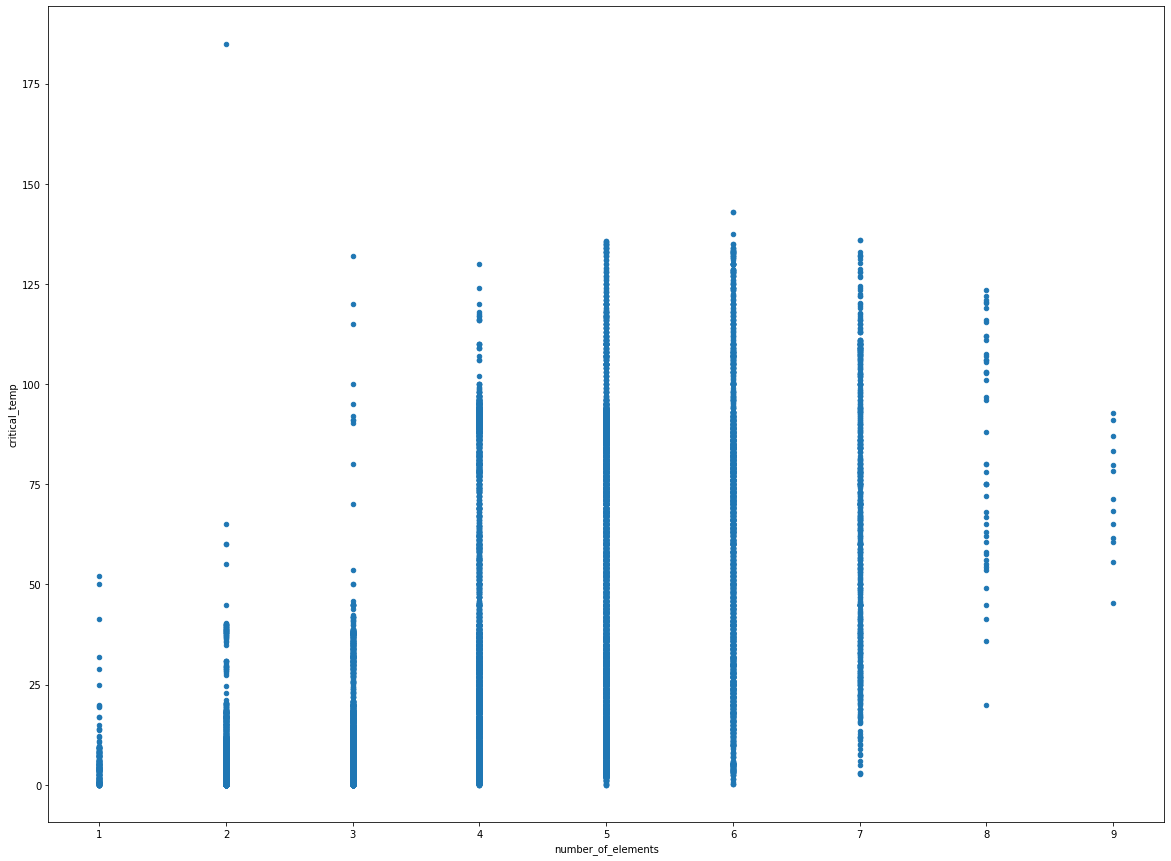

In [28]:
data = read_csv(path_join('./', 'data', 'train.csv'))
data.plot(kind='scatter', x='number_of_elements', y='critical_temp', figsize=(20, 15))

In [29]:
# train_test_split(X, y, test_size=TEST_SIZE, random_state=SEED, shuffle=True)

In [30]:
X, y = data[data.columns.difference(['critical_temp'])], data['critical_temp']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

ValueError: Expected 2D array, got 1D array instead:
array=[ 1.25 19.5  22.   ... 92.   88.7  20.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

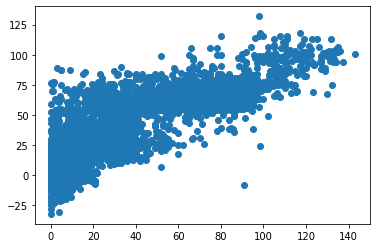

In [32]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y=y_train)
predictions = lin_reg.predict(X_test)
predictions = Series(predictions)
mse = mean_squared_error(y_test, predictions)
rmse = sqrt(mse)
# plt.scatter(y_test, predictions)
# best_fit = LinearRegression()
# best_fit.fit(y_test, predictions)
# best_line = best_fit(y_test)
# plt.plot(y_test, best_line)
# print(f'mse {mse}')
# print(f'rmse {rmse}')

In [ ]:
models = simple_regression_analysis(X_train, y_train, X_test, y_test, mean_squared_error)

In [ ]:
correlation_matrix = X_train.join(y_train).corr()
correlations = [(variable, correlation) for variable, correlation in correlation_matrix['critical_temp']
    .sort_values(ascending=False).items() if correlation >= 0.5]
correlations

In [ ]:
data.describe()

In [ ]:
features, corr_values = zip(*correlations)

In [ ]:
scatter_matrix(data[list(features)[0:5]], alpha=0.2, figsize=(30, 15))
plt.show()

In [ ]:
train_features = set(features) - {'critical_temp'}
lin_reg = LinearRegression()
lin_reg.fit(X_train[train_features], y=y_train)
predicts = lin_reg.predict(X_test[train_features])
predicts

In [ ]:
lin_mse = mean_squared_error(y_true= y_test, y_pred=predicts)
lin_rmse = sqrt(lin_mse)
lin_rmse

In [ ]:
# plt.plot()
# plt.scatter(y_test, predicts,  color='black')
# plt.plot(X_test[''], predicts, color='blue', linewidth=3)